Carga y revisión general del dataset

In [32]:
import pandas as pd 

In [33]:
df = pd.read_csv("seguros_vida.csv")

print('primeras filas:')
print(df.head())

primeras filas:
  ID_Poliza Fecha_Contratacion      Producto  Canal_Venta  Prima_Anual  \
0  POL00001         2023-01-20     Vida Plus       Broker      1054.63   
1  POL00002         2024-07-21   Vida Básico  Call Center       995.67   
2  POL00003         2024-11-04     Vida Plus       Broker       621.35   
3  POL00004         2024-10-20  Vida Premium       Agente      1130.23   
4  POL00005         2023-06-08  Vida Premium      Digital       852.15   

   Monto_Asegurado  Cliente_Edad Cliente_Sexo  Cliente_Ingreso_Mensual  \
0        156085.24            56     Femenino                  2839.72   
1        165281.22            25    Masculino                  2165.74   
2        120541.90            36     Femenino                  3386.45   
3        163883.35            70     Femenino                  5395.06   
4         24712.35            39     Femenino                  3595.80   

  Siniestro_Reportado  Monto_Siniestro Estado_Poliza        Región  
0                  No    

In [34]:
print("\informacion general:")
print(df.info())

\informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Poliza                5000 non-null   object 
 1   Fecha_Contratacion       5000 non-null   object 
 2   Producto                 5000 non-null   object 
 3   Canal_Venta              5000 non-null   object 
 4   Prima_Anual              5000 non-null   float64
 5   Monto_Asegurado          5000 non-null   float64
 6   Cliente_Edad             5000 non-null   int64  
 7   Cliente_Sexo             5000 non-null   object 
 8   Cliente_Ingreso_Mensual  5000 non-null   float64
 9   Siniestro_Reportado      5000 non-null   object 
 10  Monto_Siniestro          5000 non-null   float64
 11  Estado_Poliza            5000 non-null   object 
 12  Región                   5000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 507.9+ 

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\andre\AppData\Local\Temp\ipykernel_12568\640142871.py:1: SyntaxWarning: invalid escape sequence '\i'
  print("\informacion general:")


In [35]:
print("\valores nulos por columna:")
print(df.isnull().sum)

alores nulos por columna:
<bound method DataFrame.sum of       ID_Poliza  Fecha_Contratacion  Producto  Canal_Venta  Prima_Anual  \
0         False               False     False        False        False   
1         False               False     False        False        False   
2         False               False     False        False        False   
3         False               False     False        False        False   
4         False               False     False        False        False   
...         ...                 ...       ...          ...          ...   
4995      False               False     False        False        False   
4996      False               False     False        False        False   
4997      False               False     False        False        False   
4998      False               False     False        False        False   
4999      False               False     False        False        False   

      Monto_Asegurado  Cliente_Edad  Clie

In [36]:
print("\nduplicados:")
print(df.duplicated().sum())


duplicados:
0


PASO 2: Conversión de tipos y tratamiento de fechas

In [37]:
import datetime as dt

In [38]:
# Convertir columna a datetime
df['Fecha_Contratacion'] = pd.to_datetime(df['Fecha_Contratacion'], errors='coerce')

# Verificar si hubo errores
print(df['Fecha_Contratacion'].isnull().sum())

0


In [39]:
# Extraer año y mes

df['Año_contratacion'] = df['Fecha_Contratacion'].dt.year
df['Mes_contratcion']= df['Fecha_Contratacion'].dt.month

# Calcular antigüedad en años

fecha_actual=pd.to_datetime("today")
df['Antiguedad_poliza']= (fecha_actual- df['Fecha_Contratacion']).dt.days//365

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Poliza                5000 non-null   object        
 1   Fecha_Contratacion       5000 non-null   datetime64[ns]
 2   Producto                 5000 non-null   object        
 3   Canal_Venta              5000 non-null   object        
 4   Prima_Anual              5000 non-null   float64       
 5   Monto_Asegurado          5000 non-null   float64       
 6   Cliente_Edad             5000 non-null   int64         
 7   Cliente_Sexo             5000 non-null   object        
 8   Cliente_Ingreso_Mensual  5000 non-null   float64       
 9   Siniestro_Reportado      5000 non-null   object        
 10  Monto_Siniestro          5000 non-null   float64       
 11  Estado_Poliza            5000 non-null   object        
 12  Región                   5000 non-

PASO 3: Limpieza de variables numéricas y categóricas.

In [41]:
print(df.describe())

               Fecha_Contratacion  Prima_Anual  Monto_Asegurado  Cliente_Edad  \
count                        5000  5000.000000      5000.000000   5000.000000   
mean   2023-12-06 15:59:19.680000   903.761364     99086.040452     45.846000   
min           2022-06-12 00:00:00   200.000000      4400.000000     18.000000   
25%           2023-03-07 18:00:00   693.795000     50044.830000     32.000000   
50%           2023-12-03 00:00:00   902.025000     90141.000000     46.000000   
75%           2024-09-04 06:00:00  1112.800000    138702.600000     60.000000   
max           2025-06-11 00:00:00  2055.820000    350784.870000     74.000000   
std                           NaN   300.300994     59141.021712     16.364554   

       Cliente_Ingreso_Mensual  Monto_Siniestro  Año_contratacion  \
count              5000.000000      5000.000000       5000.000000   
mean               3500.639738      5488.590966       2023.427200   
min                1000.000000         0.000000       2022.0000

In [42]:
# Eliminar primas, edades o ingresos negativos o extremadamente altos

df = df[df['Prima_Anual'] > 0]
df = df[(df['Cliente_Edad'] > 18) & (df['Cliente_Edad'] <=100 )]
df = df[(df['Cliente_Ingreso_Mensual'] > 0) & (df['Cliente_Ingreso_Mensual'] <50000 )]
df = df[df['Monto_Asegurado'] > 0]

# Reemplazar monto siniestro en pólizas sin siniestro
df.loc[df['Siniestro_Reportado'] == 'No', 'Monto_Siniestro'] = 0

# Asegurar que Monto_Siniestro no sea negativo
# Escalamos los siniestros con un factor (por ejemplo, 0.2)
df['Monto_Siniestro'] = df['Monto_Siniestro'] * (0.2 / 1.2)

In [43]:
total_primas = df['Prima_Anual'].sum()
total_siniestros = df['Monto_Siniestro'].sum()
tasa_siniestralidad = total_siniestros / total_primas

print(f"Tasa de siniestralidad global: {tasa_siniestralidad:.2%}")


Tasa de siniestralidad global: 100.46%


In [44]:
# Valores únicos por columna categórica
categoricas = ['Producto', 'Canal_Venta', 'Cliente_Sexo', 'Siniestro_Reportado', 'Estado_Poliza', 'Región']
for col in categoricas:
    print(f"{col}: {df[col].unique()}")


Producto: ['Vida Plus' 'Vida Básico' 'Vida Premium' 'Protección Familiar']
Canal_Venta: ['Broker' 'Call Center' 'Agente' 'Digital']
Cliente_Sexo: ['Femenino' 'Masculino']
Siniestro_Reportado: ['No' 'Sí']
Estado_Poliza: ['Activa' 'Cancelada' 'Vencida']
Región: ['Antioquia' 'Atlántico' 'Cundinamarca' 'Valle del Cauca' 'Bogotá'
 'Santander']


PASO 4: Análisis exploratorio y visualización en Python

Distribución general de productos vendidos

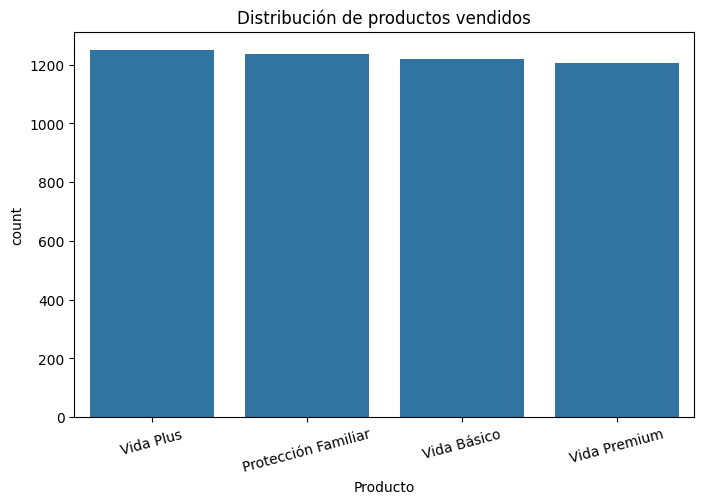

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Producto', data=df, order=df['Producto'].value_counts().index)
plt.title('Distribución de productos vendidos')
plt.xticks(rotation=15)
plt.show()


Ingresos por canal de venta (suma de primas)

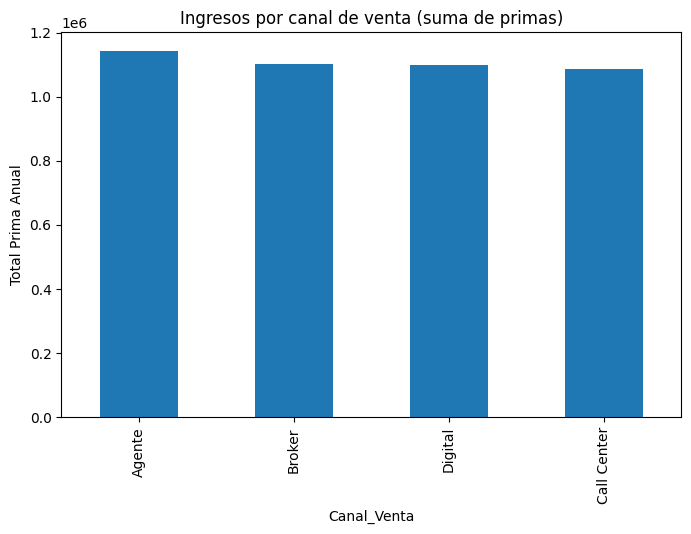

In [46]:
df.groupby('Canal_Venta')['Prima_Anual'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Ingresos por canal de venta (suma de primas)', figsize=(8,5), ylabel='Total Prima Anual')
plt.show()


Tasa de siniestralidad por producto

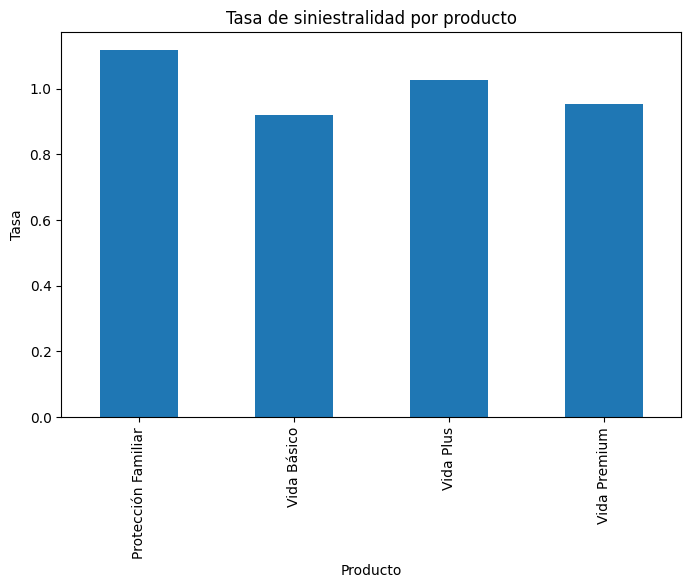

In [47]:
siniestros_por_producto = df.groupby('Producto').agg({
    'Monto_Siniestro': 'sum',
    'Prima_Anual': 'sum'
})

siniestros_por_producto['Tasa_Siniestralidad'] = siniestros_por_producto['Monto_Siniestro'] / siniestros_por_producto['Prima_Anual']

siniestros_por_producto['Tasa_Siniestralidad'].plot(kind='bar', title='Tasa de siniestralidad por producto', figsize=(8,5))
plt.ylabel('Tasa')
plt.show()

KPIs globales iniciales

In [48]:
total_polizas = df.shape[0]
total_primas = df['Prima_Anual'].sum()
total_siniestros = df['Monto_Siniestro'].sum()
tasa_siniestralidad = total_siniestros / total_primas

print(f"Total de pólizas: {total_polizas:,}")
print(f"Total primas recaudadas: ${total_primas:,.2f}")
print(f"Total monto siniestros: ${total_siniestros:,.2f}")
print(f"Tasa de siniestralidad global: {tasa_siniestralidad:.2%}")


Total de pólizas: 4,908
Total primas recaudadas: $4,433,355.59
Total monto siniestros: $4,453,675.34
Tasa de siniestralidad global: 100.46%


Parte 2: KPIs e Insights – Rentabilidad de Seguros de Vida.

 Ingreso promedio por producto

In [49]:
kpi_ingreso_producto = df.groupby('Producto')['Prima_Anual'].mean().reset_index()
kpi_ingreso_producto.rename(columns={'Prima_Anual': 'Ingreso_Promedio'}, inplace=True)
kpi_ingreso_producto


,Producto,Ingreso_Promedio
0,Protección Familiar,911.934131
1,Vida Básico,896.412332
2,Vida Plus,901.084856
3,Vida Premium,903.658880


Tasa de siniestralidad por producto

In [50]:
kpi_siniestralidad_producto = df.groupby('Producto').agg({
    'Monto_Siniestro': 'sum',
    'Prima_Anual': 'sum'
}).reset_index()

kpi_siniestralidad_producto['Tasa_Siniestralidad'] = (
    kpi_siniestralidad_producto['Monto_Siniestro'] / kpi_siniestralidad_producto['Prima_Anual']
)
kpi_siniestralidad_producto


,Producto,Monto_Siniestro,Prima_Anual,Tasa_Siniestralidad
0,Protección Familiar,1.259530e+06,1128062.52,1.116543
1,Vida Básico,1.002632e+06,1091830.22,0.918304
2,Vida Plus,1.153448e+06,1124553.90,1.025694
3,Vida Premium,1.038065e+06,1088908.95,0.953307


Valor promedio del siniestro por región

KPIs generales (para tarjetas)

In [59]:
total_polizas = df.shape[0]
total_primas = df['Prima_Anual'].sum()
total_siniestros = df['Monto_Siniestro'].sum()
tasa_siniestralidad = total_siniestros / total_primas

print(f"✅ Total pólizas vendidas: {total_polizas:,}")
print(f"💰 Total primas recaudadas: ${total_primas:,.2f}")
print(f"💸 Total siniestros pagados: ${total_siniestros:,.2f}")
print(f"📉 Tasa de siniestralidad global: {tasa_siniestralidad:.2%}")

✅ Total pólizas vendidas: 4,908
💰 Total primas recaudadas: $4,433,355.59
💸 Total siniestros pagados: $4,453,675.34
📉 Tasa de siniestralidad global: 100.46%
